In [2]:
# Here we will create some blob points and try to fit a Decision Tree Classifier and further explore Random Forest Classifier over them.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import helpers_file
import seaborn as sns;sns.set()


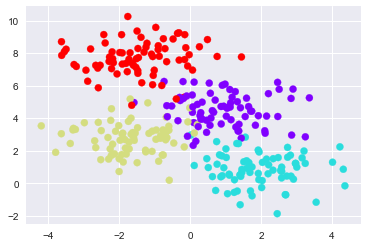

In [3]:
X,y = make_blobs(n_samples=300,centers = 4 , random_state=0,cluster_std=1.0)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow');
#Here we can see 4 set of point clusters on which we will fit Decision tree

In [4]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier().fit(X,y)

In [5]:
def visualize_classifier(model,X,y,ax=None,cmap='rainbow'):
    ax = ax or plt.gca()
    #plot the training points
    ax.scatter(X[:,0],X[:,1],c=y,s=30,cmap=cmap,clim=(y.min(),y.max()),zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim=ax.get_xlim()
    ylim = ax.get_ylim()
    #fit the estimator
    model.fit(X,y)
    xx,yy = np.meshgrid(np.linspace(*xlim,num=200),np.linspace(*ylim,num=200))
    Z=model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    
    #Create the color plot with results
    n_classes = len(np.unique(y))
    contours = ax.contour(xx,yy,Z,alpha=0.3,levels = np.arange(n_classes+1)-0.5,cmap=cmap,clim=(y.min(),y.max()),zorder=1)
    ax.set(xlim=xlim,ylim=ylim)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


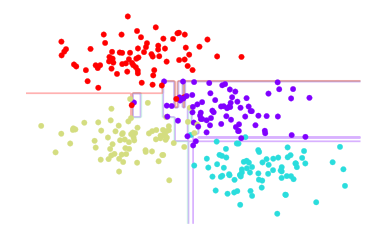

In [6]:
visualize_classifier(DecisionTreeClassifier(),X,y)

In [7]:
helpers_file.plot_tree_interactive(X,y);

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

In [8]:
helpers_file.randomized_tree_interactive(X,y);

interactive(children=(Dropdown(description='random_state', options=(0, 100), value=0), Output()), _dom_classes…

In [9]:
#Now let's see how Random Forest Classifier will perform..!!

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


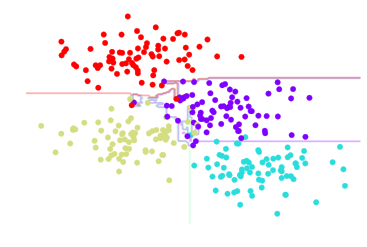

In [12]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree,n_estimators = 100,max_samples = 0.8,random_state = 1)
bag.fit(X,y)
visualize_classifier(bag,X,y)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


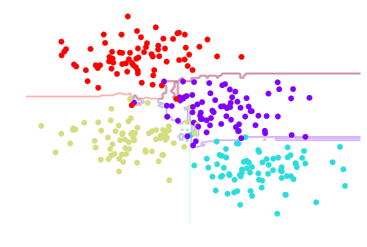

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100,random_state = 0)
visualize_classifier(model,X,y)

In [15]:
#Let's Apply Random Forest Regression

<ErrorbarContainer object of 3 artists>

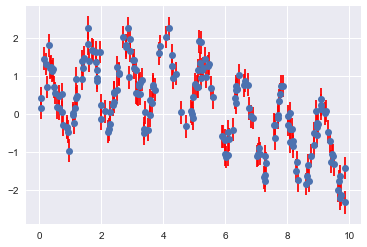

In [47]:
rng = np.random.RandomState(42)
x = 10*rng.rand(200)
def model(x,sigma = 0.3):
    fast_oscillation = np.sin(5*x)
    slow_oscillation = np.sin(0.5*x)
    noise = sigma*rng.randn(len(x))
    return(fast_oscillation+slow_oscillation+noise)

y=model(x)
plt.errorbar(x,y,0.3,fmt='o',ecolor = 'r')
#See the variation by increasing length of the line

<ErrorbarContainer object of 3 artists>

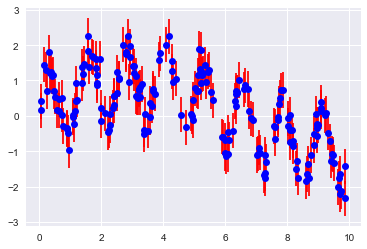

In [48]:
plt.errorbar(x,y,0.5,fmt = 'bo',ecolor='r')

<ErrorbarContainer object of 3 artists>

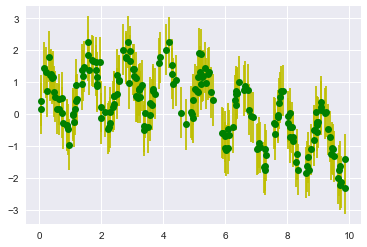

In [51]:
plt.errorbar(x,y,0.8,fmt = 'go',ecolor='y')

In [54]:
#Using the Random Forest Regressor, we can find the best fit curve:

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:,None],y)
xfit = np.linspace(0,10,100)
yfit = forest.predict(xfit[:,None])
ytrue = model(xfit,sigma = 0)

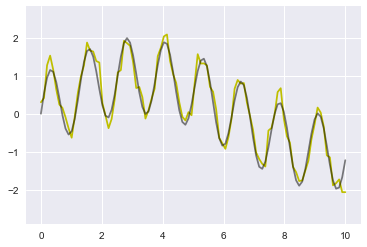

In [74]:
plt.errorbar(x,y,0.3,fmt = 'go',alpha=0)
plt.plot(xfit,yfit,'-y');
plt.plot(xfit,ytrue,'-k',alpha = 0.5);
#True model is shown in the Smooth Grey Curve,while the random forest model is shown in jagged yellow curve

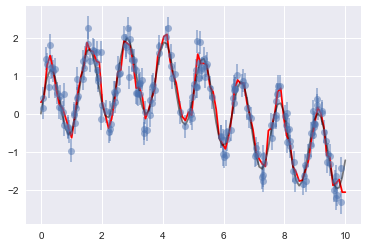

In [79]:
plt.errorbar(x,y,0.3,fmt = 'o',alpha=0.5)
plt.plot(xfit,yfit,'-r');
plt.plot(xfit,ytrue,'-k',alpha = 0.5);
#The same plotting but with points to give more understanding towards the curve.
#True Model : Smooth Grey Curve
#Random Forest: Jagged Red Curve

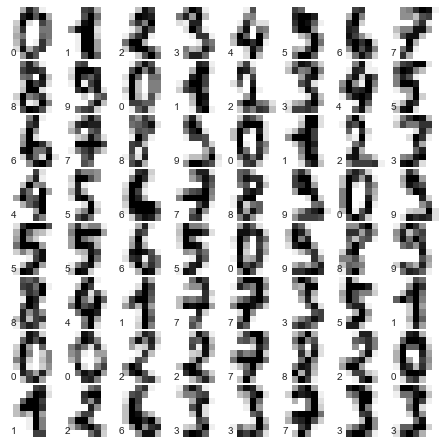

In [81]:
#Ex: Random Forest for Classifying Digits
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

#Set a figure
fig = plt.figure(figsize = (6,6))
fig.subplots_adjust(left = 0, right = 1,bottom =0,top = 1, hspace = 0.005, wspace = 0.05)

#plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8,8,i+1,xticks = [],yticks = [])
    ax.imshow(digits.images[i],cmap = plt.cm.binary,interpolation = 'nearest')
    
    #Label  the image with target value
    ax.text(0,7,str(digits.target[i]))

In [82]:
#We quickly classify the digits using a random forest as :
from sklearn.cross_validation import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(digits.data,digits.target,random_state = 0)
model = RandomForestClassifier(n_estimators = 1000)
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [83]:
from sklearn import metrics
print(metrics.classification_report(ypred,ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       0.98      0.98      0.98        43
          2       0.95      1.00      0.98        42
          3       0.98      0.96      0.97        46
          4       0.97      1.00      0.99        37
          5       0.98      0.96      0.97        49
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.94      0.98      0.96        46
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



Text(92.68,0.5,'Predicted Label')

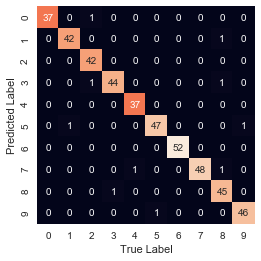

In [93]:
#For  Good Measure.....plot the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
mat = confusion_matrix(ytest,ypred)
sns.heatmap(mat.T,square = True , annot = True, fmt ='d',cbar = False);
plt.xlabel("True Label")
plt.ylabel('Predicted Label')

In [98]:
#Hence from this we conclude
print(model.accuracy_score(ytest,ypred))
#The accuracy to 

AttributeError: 'RandomForestClassifier' object has no attribute 'accuracy_score'